In [50]:
import sys
import os

import spotipy
import json
import pprint
import pandas as pd
import configparser
import seaborn
import matplotlib as plt


import spotipy.oauth2 as oauth2
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [51]:
config = configparser.ConfigParser()
config.read('config_ernflerberg.cfg')
client_id = config.get('SPOTIFY', 'CLIENT_ID')
client_secret = config.get('SPOTIFY', 'CLIENT_SECRET')
username = config.get('SPOTIFY', 'USERNAME')


auth = oauth2.SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
)

token = auth.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [52]:
uri = 'spotify:user:spotifycharts:playlist:37i9dQZEVXbJiZcmkrIHGU'
username = username

#aaron's like playlist 6ygnOWyCTMajdAY3vFM5BA
playlist_id = "67hGWrUlSHm47BmDWPHIZD" #add the last part of the playlist url here. https://open.spotify.com/user/ernflerberg/playlist/67hGWrUlSHm47BmDWPHIZD?si=6ygnOWyCTMajdAY3vFM5BA

results = spotify.user_playlist(username, playlist_id)


In [53]:
results['tracks']['items'][0]['track']['id']

'1g5CHtsDQl7KVWaUiAwat0'

In [86]:
df = []
for i in results['tracks']['items']:
    df.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
df = pd.DataFrame(df)  
df.head()

,0,1,2,3,4,5,6
0,1g5CHtsDQl7KVWaUiAwat0,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,237533,Lycanthrope,41
1,1VpTwecl7EbQiGyVsvwFQE,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,192786,When Your Heart Stops Beating,53
2,4isP4utvgJyHHp1iYOAMQQ,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,211613,"No, It Isn't",41
3,1zBFEYEwHKCahttaE2mhg7,2019-03-20T05:01:06Z,311,311 (Deluxe Version),172053,Down,52
4,18ZOH3KKu5Elt5ysocFyX4,2019-03-20T05:01:06Z,311,311,179600,All Mixed Up,60


In [55]:
df.columns = ['song_id','added_at','Artist','Album','Durastion_ms','Song','Popularity']

In [56]:
df.head()

,song_id,added_at,Artist,Album,Durastion_ms,Song,Popularity
0,1g5CHtsDQl7KVWaUiAwat0,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,237533,Lycanthrope,41
1,1VpTwecl7EbQiGyVsvwFQE,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,192786,When Your Heart Stops Beating,53
2,4isP4utvgJyHHp1iYOAMQQ,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,211613,"No, It Isn't",41
3,1zBFEYEwHKCahttaE2mhg7,2019-03-20T05:01:06Z,311,311 (Deluxe Version),172053,Down,52
4,18ZOH3KKu5Elt5ysocFyX4,2019-03-20T05:01:06Z,311,311,179600,All Mixed Up,60


In [57]:
sp = spotipy.Spotify(auth=token)

In [58]:
et = []
for i in df.song_id:
    x = sp.audio_features(i)
    et.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
et = pd.DataFrame(et)

In [59]:
et.columns = ['song_id',
             'danceability',
             'energy',
             'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]

In [60]:
DF = pd.merge(df, et, on='song_id')

In [61]:
DF.head()

,song_id,added_at,Artist,Album,Durastion_ms,Song,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1g5CHtsDQl7KVWaUiAwat0,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,237533,Lycanthrope,41,0.363,0.989,9,-2.361,0,0.0942,0.000037,0.000000,0.0687,0.467,168.015,4
1,1VpTwecl7EbQiGyVsvwFQE,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,192786,When Your Heart Stops Beating,53,0.420,0.968,9,-2.353,0,0.1230,0.000232,0.000000,0.0796,0.392,171.004,4
2,4isP4utvgJyHHp1iYOAMQQ,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,211613,"No, It Isn't",41,0.482,0.640,9,-4.695,1,0.0244,0.021000,0.000000,0.2120,0.450,95.030,4
3,1zBFEYEwHKCahttaE2mhg7,2019-03-20T05:01:06Z,311,311 (Deluxe Version),172053,Down,52,0.440,0.935,6,-6.304,0,0.0692,0.000165,0.000002,0.3200,0.578,175.253,4
4,18ZOH3KKu5Elt5ysocFyX4,2019-03-20T05:01:06Z,311,311,179600,All Mixed Up,60,0.760,0.702,10,-9.404,0,0.0716,0.010400,0.000000,0.3800,0.659,92.324,4


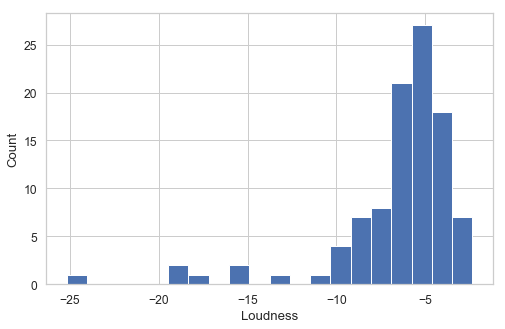

In [62]:
seaborn.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
seaborn.distplot(
    et['loudness'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Loudness', ylabel='Count');

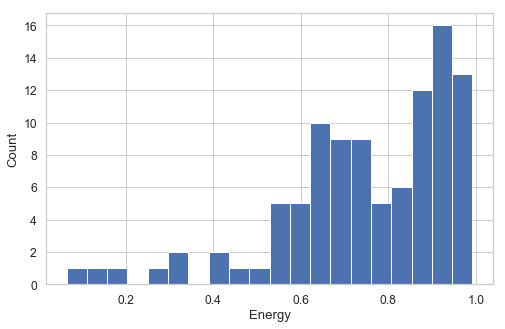

In [63]:
seaborn.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
seaborn.distplot(
    et['energy'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Energy', ylabel='Count');

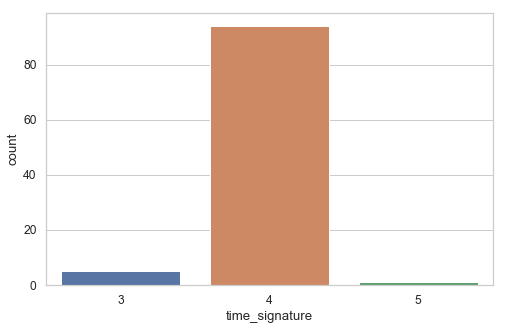

In [64]:
seaborn.countplot(et['time_signature']);

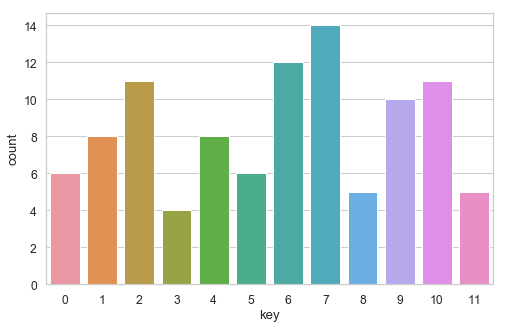

In [65]:
seaborn.countplot(et['key']);

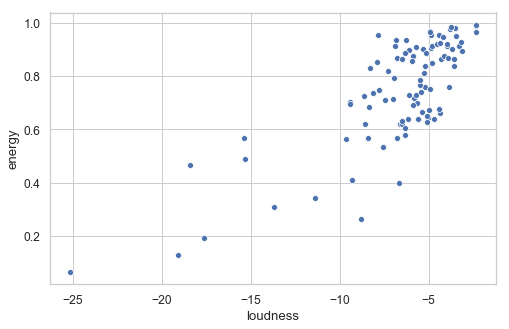

In [69]:
seaborn.scatterplot(x=et['loudness'], y=et['energy']);

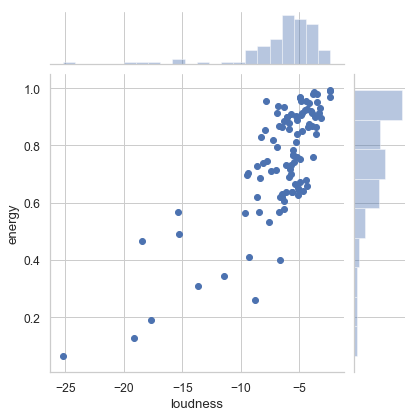

In [70]:
seaborn.jointplot(x=et['loudness'], y=et['energy']);

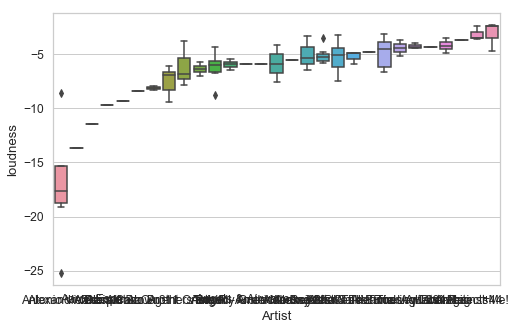

In [92]:
sorted_nb = DF.groupby(['Artist'])['loudness'].median().sort_values()
seaborn.boxplot(x=DF['Artist'], y=DF['loudness'], order=list(sorted_nb.index))